<a href="https://colab.research.google.com/github/Aryann29/ML-Portfolio/blob/main/Twitter%20US%20Airline%20Sentiment/twitter_airline_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
* Twitter possesses 330 million monthly active users, which 
allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly 


* That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

* Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.






In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 177MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [131]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/twitter-airline-sentiment.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
raw = pd.read_csv('/content/Tweets.csv')

In [103]:
df = raw.copy()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [105]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [106]:
df.shape

(14640, 15)

In [107]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64



*   airline_sentiment_gold and negativereason_gold are both have null values for nearly all entries.
* The text column, and airline_sentiment, both have 0 null values.
*   tweet_coord column also has a majority of null values for the column.



In [108]:
df.duplicated().sum()

36

* It looks like we have 36 duplicated rows in the dataset
Let's go ahead and drop these duplicate rows

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.reset_index(drop=True)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14600,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14601,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14602,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [111]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

* We have 3 values for airline_sentiment
* 10 different negative reasons given
* There are 6 different airlines in the dataset
* The name column has only 7701 unique values so it looks like we have multiple tweets listed for some of the usernames.

## EDA

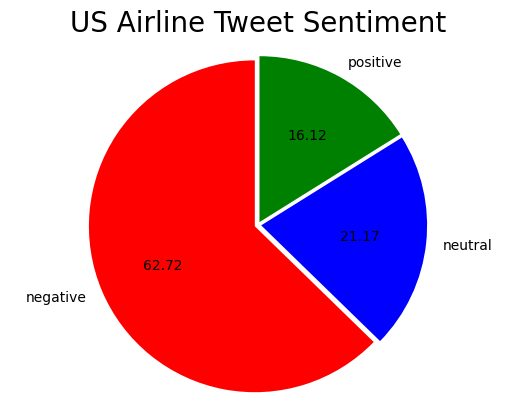

In [16]:
colors = ['r' , 'b',  'g']

plot = plt.pie( df['airline_sentiment'].value_counts() ,
               labels=df['airline_sentiment'].value_counts().index,
               colors=colors, explode=(0.02,0.02,0.02),  startangle=90, autopct='%.2f')
plt.title('US Airline Tweet Sentiment', size=20)
plt.axis('equal')
plt.show()


* It looks like the majority of tweets have a negative sentiment.
* Positive tweets make up the smallest portion of sentiments in the dataset.

In [17]:
df['airline_sentiment'].value_counts().index

Index(['negative', 'neutral', 'positive'], dtype='object')

In [18]:
def label_bar(df, feature, perc=False, n=None):
    '''
    Barplot with percentage
    data: data
    feature: data column
    perc: display percentages
    n: top n category levels
    '''

    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 4, 6))
    else:
        plt.gifure(figsize=(n + 4, 6))

    plt.xticks(rotation=90, fontsize=14)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette='gist_earth',
        order=df[feature].value_counts().index[:n].sort_values()
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x,y),
            ha='center',
            va='center',
            size=10,
            xytext=(0,5),
            textcoords='offset points'
        )

    plt.show()

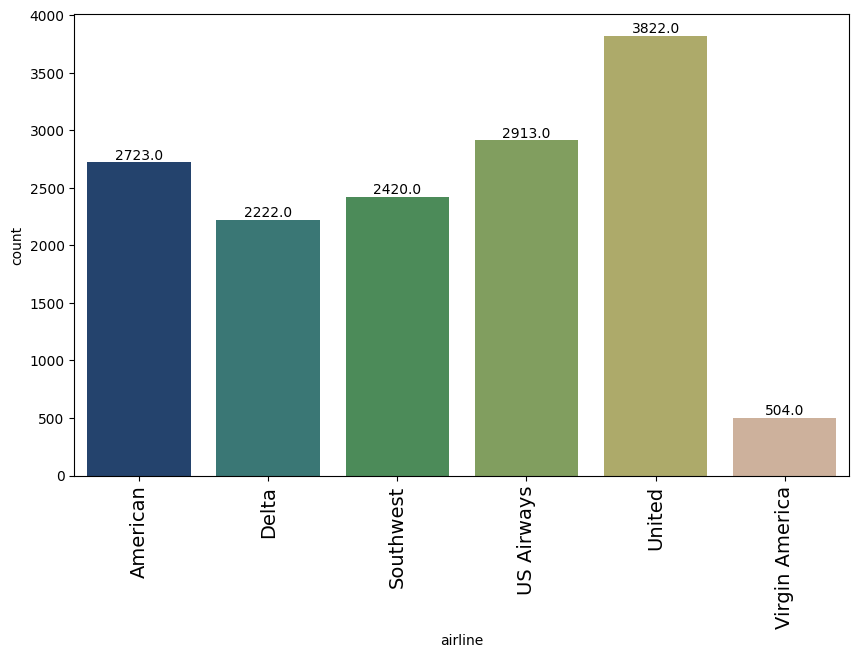

In [19]:
label_bar(df, 'airline')

In [20]:
def stacked_bar(data, predictor, target):
    '''
    plot stacked bar chart with category counts

    data: data
    predictor: independent variable
    target: dependent variable ('airline_sentiment')
    '''

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print('*'*88)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 8))
    plt.legend(
        loc='lower left',
        frameon=False
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9159     3091      2354  14604
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1941      455       327   2723
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
****************************************************************************************


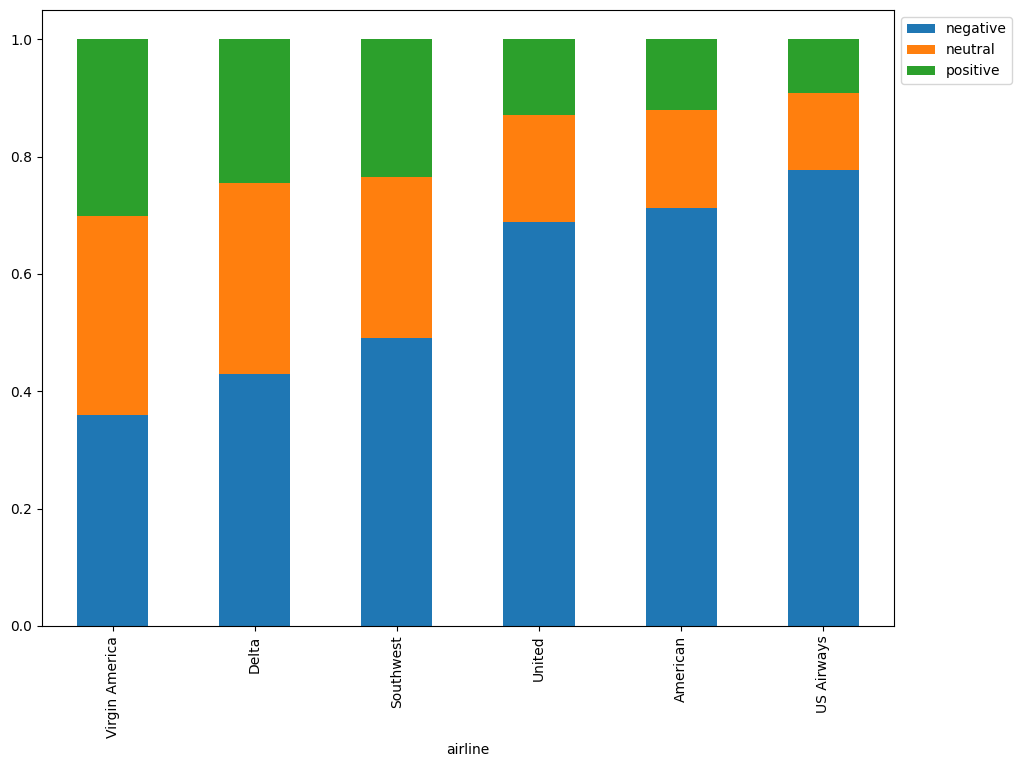

In [21]:
stacked_bar(df, 'airline', 'airline_sentiment')

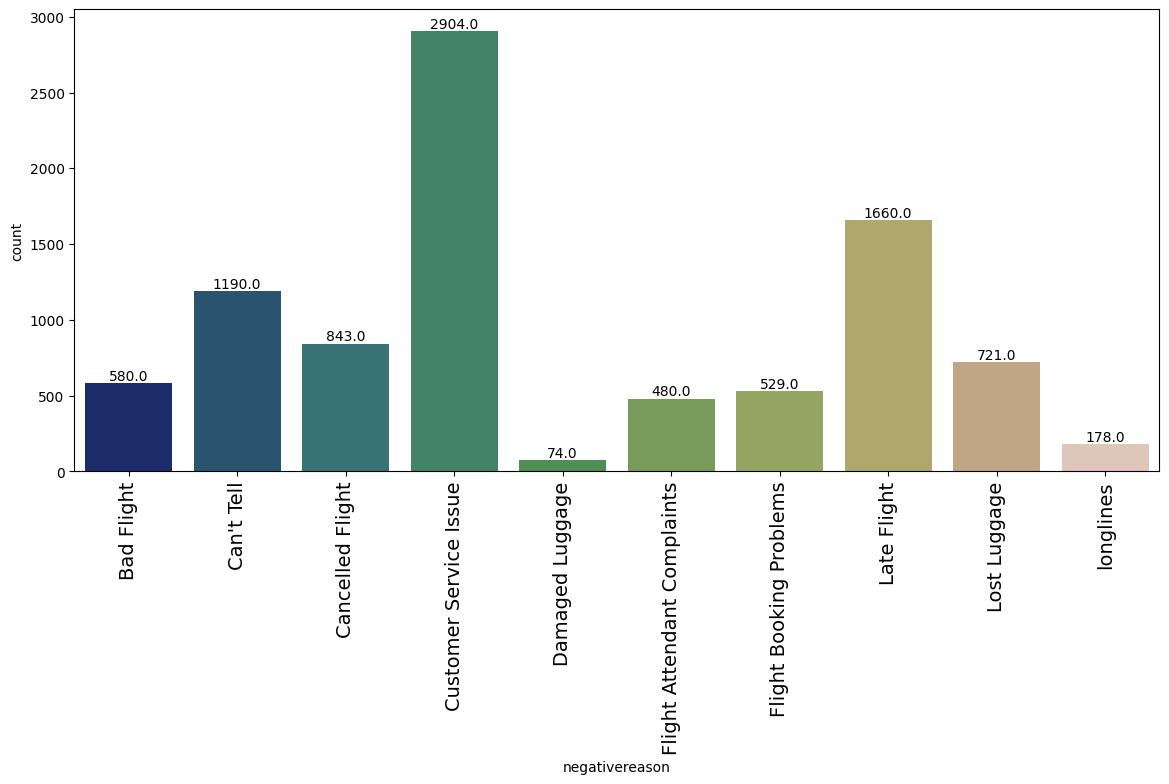

In [22]:
label_bar(df, 'negativereason')

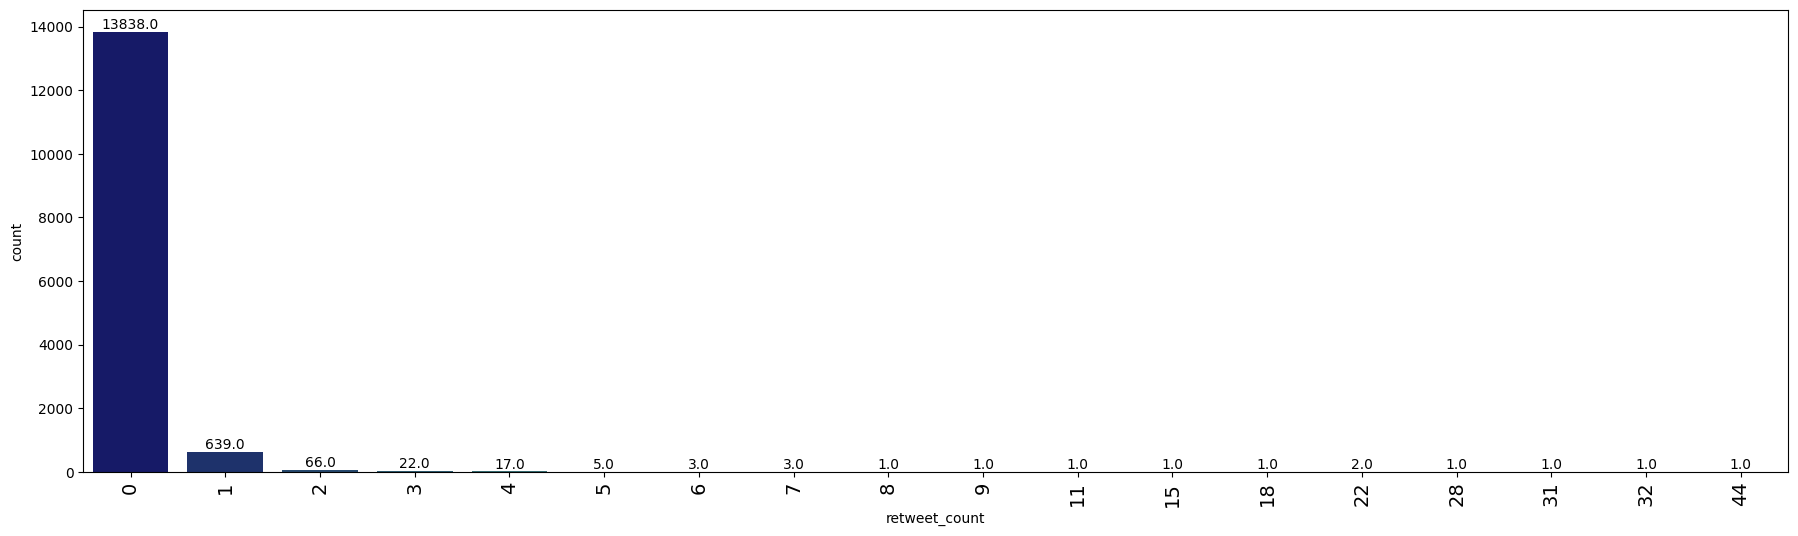

In [23]:
label_bar(df, 'retweet_count')

In [24]:
negative_tweets = df[df['airline_sentiment'] == 'negative']
neg_words = ' '.join(negative_tweets['text'])
cleaned_neg_word = " ".join([word for word in neg_words.split()
                          if 'http' not in word
                          and not word.startswith('@')
                          and word != 'RT'])

In [25]:
negative_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=4500,
                      height=3000).generate(cleaned_neg_word)

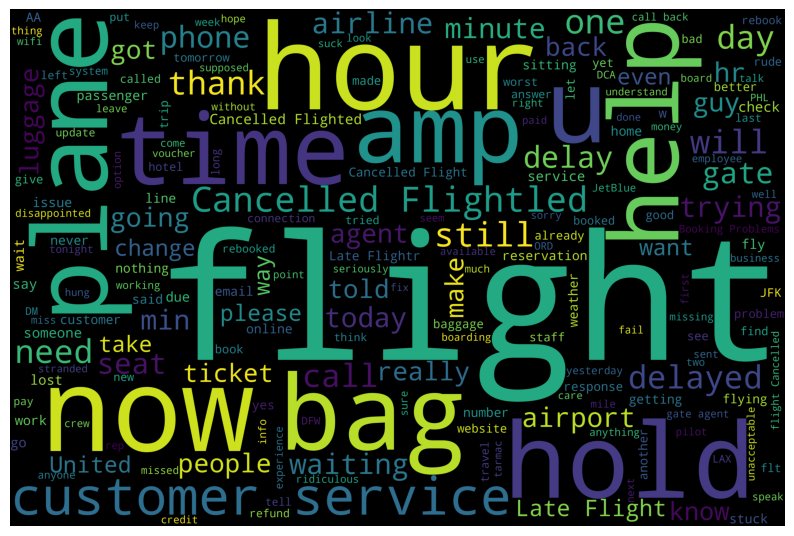

In [156]:
# Displaying the negative wordcloud image
plt.figure(1, figsize=(10,10))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

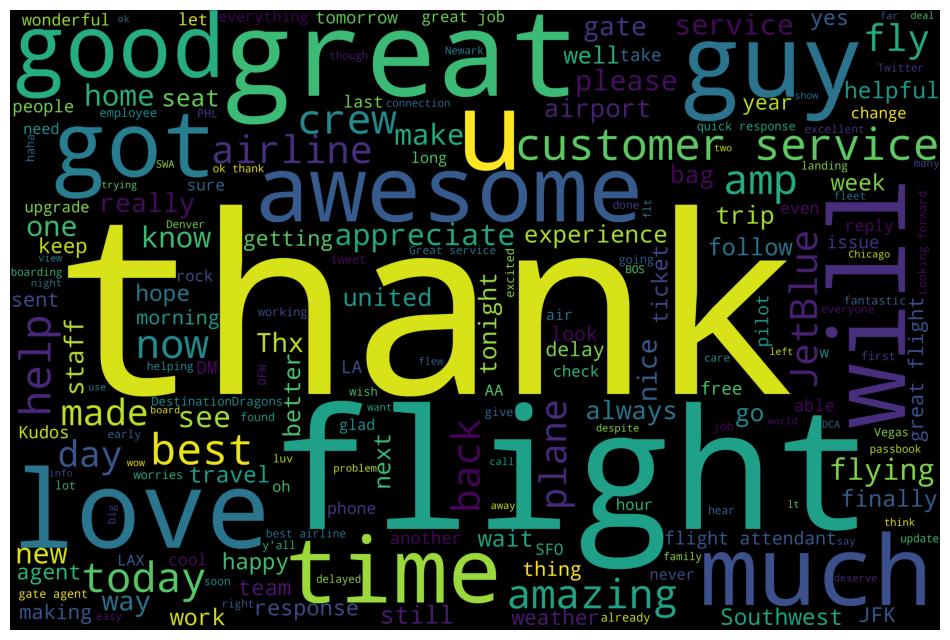

In [29]:
positive_tweets = df[df['airline_sentiment'] == 'positive']
pos_words = ' '.join(positive_tweets['text'])
cleaned_pos_word = " ".join([word for word in pos_words.split()
                          if 'http' not in word
                          and not word.startswith('@')
                          and word != 'RT'])
positive_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=4500,
                      height=3000).generate(cleaned_pos_word)

plt.figure(1, figsize=(12,12))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

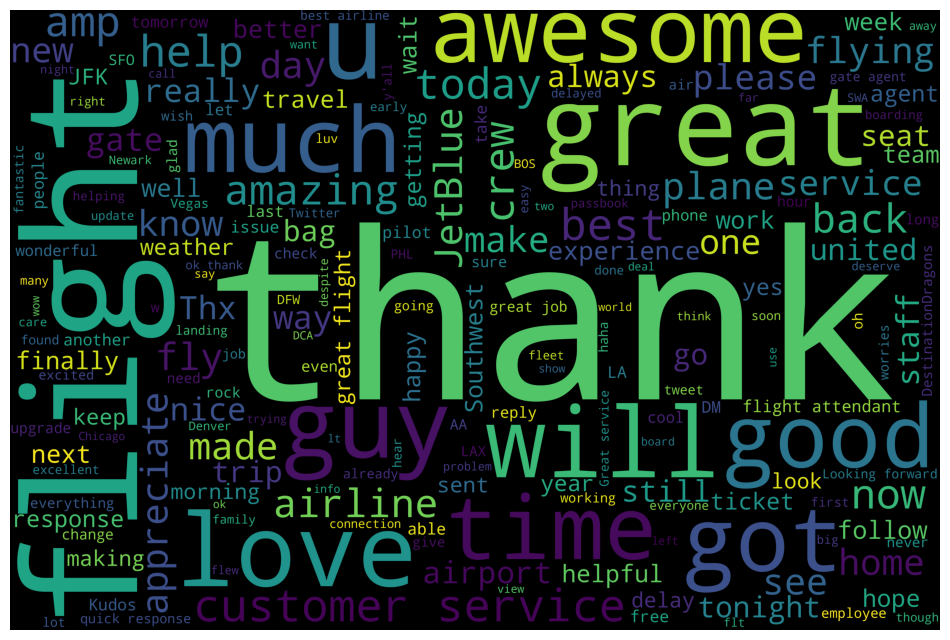

In [32]:
neutral_tweets = df[df['airline_sentiment'] == 'positive']
neu_words = ' '.join(neutral_tweets['text'])
cleaned_neu_word = " ".join([word for word in neu_words.split()
                          if 'http' not in word
                          and not word.startswith('@')
                          and word != 'RT'])
neutral_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=4500,
                      height=3000).generate(cleaned_neu_word)

plt.figure(1, figsize=(12,12))
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.show()

* The results for the neutral wordcloud are a little concerning as I see some crossover from terms which have more positive or negative connotations.
* "Thank", and "u", are pretty prominent in both the positive and neutral word clouds, but I feel these words tend to have a more positive leaning sentiment.
"help" is featured as one of the larger words in both the negative and neutral wordclouds, but I feel tweets including "help" may have more of a negative sentiment, rather than neutral, but context is going to be more important on this term.
* Then we also have "JetBlue", "fleet", and "fleek" represented as some of the larger words in the neutral wordcloud, but as we saw in the 6 most retweeted messages we looked at, 2 of them were addressing these exact terms, but both were negative, and labeled as such. These words were not represented in the negative wordcloud which leads me to believe that many of the sentiments for tweets including these terms may have been mislabeled as neutral. If this is the case we will have to see how it affects our model.
* Words that are more prominent for neutral are "need", "know", "now", "way", "will", "DM", "please", "change", "check", and "ticket".

# Summary of EDA

* Overall the tweets have more of a negative sentiment, and this overall majority for negative sentiment holds true across all airlines.
United had the most tweets by far, but they did manage to not have the lowest positive twwets as a percentage of their total tweets. US Airways had the lowest amount of positive sentiment when looking at a percentage of their total tweet count.
* We were able to see some of the most important terms for the 3 sentiments, but the neutral wordcloud shows multiple terms that don't seem very neutral in nature. Context will be important for how those terms are being used in the neutral tweets.
* The tweets about Jet Blue's slogan, "Our fleet is on Fleek", were shown to have a negative sentiment based on 2 of the 6 most retweeted messages we looked at. The only problem is that these terms are showing up as large words in the neurtal wordcloud and not in the negative wordcloud at all. This shows that there are a fair amount of tweets all addressing these same terms, but a neutral sentiment does not seem to be intention of the messages containing these words. This may mean that we have a large number of tweets classified as neutral, but should really be classified as having a negative sentiment.

In [27]:
import re, string, unicodedata
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [47]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00


In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

* Remove html tags
* Remove URLs
* Replace contractions
* Remove numbers
* Remove @ mentions
* Tokenization
* Remove punctuation
* Remove non-ASCII characters
* Remove hashtags
* Convert to lowercase
* Remove Stopwords
* Lemmatize words
* Join words in list to convert

In [112]:
df = df[['text', 'airline_sentiment']]

In [113]:
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
def expand_contractions(text):
    return contractions.fix(text)

In [114]:
def clean_text(text):
    cleaned_text = ''
    text = remove_html(text)
    text= text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+\s?', '', text)
    text = re.sub('[0-9]+', '', text)
    text = expand_contractions(text)

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"(.)\1\1+", r"\1\1", text)
    for i in text:
        if i.isalnum(): 
            cleaned_text += i
        else:
            cleaned_text += " "

    text_t = word_tokenize(cleaned_text)
    filtered_text = [word for word in text_t if word not in STOPWORDS]

    lm = WordNetLemmatizer()
    lemm_words = [lm.lemmatize(word,pos='v') for word in filtered_text]


    return ' '.join(lemm_words)

In [115]:
df['text'] = df['text'].apply(lambda x: clean_text(x))   

<ipython-input-113-76c106a89933>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [116]:
df

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
...,...,...
14635,thank get different flight chicago,positive
14636,leave minutes late flight warn communication m...,negative
14637,please bring american airlines blackberry,neutral
14638,money change flight answer phone suggestions m...,negative


In [120]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
cv = CountVectorizer(max_features=1000)
vectors = cv.fit_transform(df['text']).toarray()

In [128]:
from nltk.lm import vocabulary

print('Vocabulary: ', cv.vocabulary_)

Vocabulary:  {'say': 770, 'plus': 671, 'add': 12, 'experience': 314, 'today': 883, 'must': 582, 'mean': 543, 'need': 587, 'take': 860, 'another': 45, 'trip': 898, 'really': 713, 'entertainment': 292, 'face': 321, 'little': 510, 'big': 104, 'bad': 88, 'thing': 872, 'seriously': 785, 'pay': 650, 'flight': 355, 'seat': 774, 'play': 667, 'fly': 364, 'yes': 994, 'every': 301, 'time': 880, 'will': 969, 'go': 397, 'away': 83, 'miss': 569, 'without': 975, 'well': 965, 'now': 607, 'amaze': 37, 'arrive': 64, 'hour': 434, 'early': 276, 'good': 400, 'know': 479, 'second': 776, 'lead': 490, 'pretty': 683, 'much': 579, 'better': 102, 'great': 401, 'deal': 229, 'already': 35, 'think': 874, 'nd': 586, 'even': 298, 'st': 825, 'yet': 996, 'sky': 803, 'travel': 894, 'thank': 871, 'schedule': 771, 'still': 836, 'mia': 555, 'excite': 308, 'first': 349, 'cross': 210, 'country': 202, 'lax': 488, 'mco': 541, 'hear': 416, 'nothing': 603, 'things': 873, 'virgin': 941, 'america': 38, 'nyc': 610, 'sfo': 790, 'las

In [129]:
X = vectors
y = df['airline_sentiment'].map({'negative':-1, 'neutral':0, 'positive':1})

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [138]:
def cm_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    print('Accuracy Score :', accuracy_score(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm,
                     index = ['negative', 'neutral', 'positive'], 
                     columns = ['negative', 'neutral', 'positive'])
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm_df, annot=True, fmt='.2f')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      6411
           0       0.96      0.98      0.97      2163
           1       0.97      0.98      0.98      1648

    accuracy                           0.99     10222
   macro avg       0.98      0.98      0.98     10222
weighted avg       0.99      0.99      0.99     10222

Accuracy Score : 0.9864018783017022


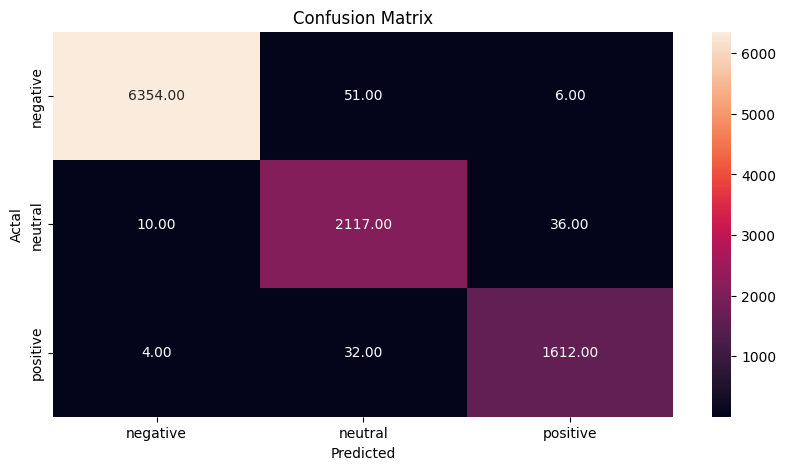

In [139]:
y_pred_train = model.predict(X_train)
cm_metrics(y_train, y_pred_train)

              precision    recall  f1-score   support

          -1       0.82      0.88      0.85      2748
           0       0.55      0.49      0.52       928
           1       0.71      0.61      0.66       706

    accuracy                           0.75      4382
   macro avg       0.69      0.66      0.67      4382
weighted avg       0.74      0.75      0.75      4382

Accuracy Score : 0.752852578731173


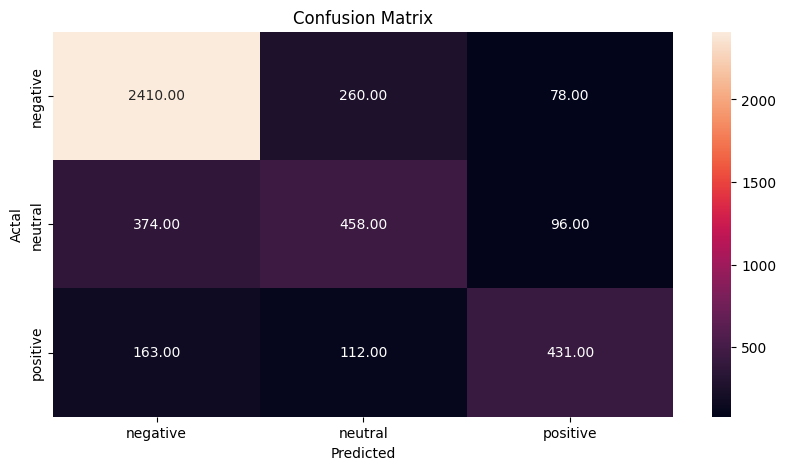

In [140]:
y_pred = model.predict(X_test)
cm_metrics(y_test, y_pred)

In [141]:
def top40(model, all_features):
    
    # top_features as top 40 after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','    
    
    wordcloud = WordCloud(background_color = "black", width = 4500, 
                              height = 3000).generate(top_features)
    plt.imshow(wordcloud)
    plt.figure(1, figsize = (12, 12), frameon='equal')
    plt.title('Top 40 features', fontsize = 12)
    plt.axis("off")
    plt.show()

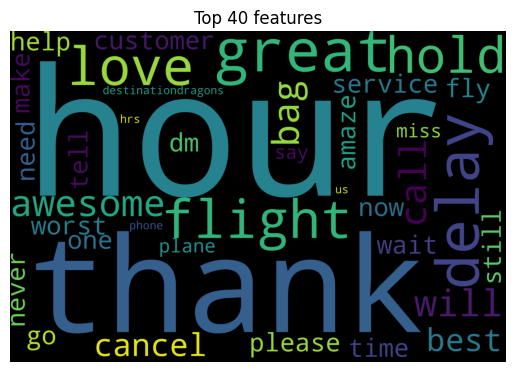

In [142]:
features = cv.get_feature_names_out()   

top40(model, features)

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text']).toarray()

In [155]:
print(tfidf_vectorizer.vocabulary_)


word indexes:
{'say': 770, 'plus': 671, 'add': 12, 'experience': 314, 'today': 883, 'must': 582, 'mean': 543, 'need': 587, 'take': 860, 'another': 45, 'trip': 898, 'really': 713, 'entertainment': 292, 'face': 321, 'little': 510, 'big': 104, 'bad': 88, 'thing': 872, 'seriously': 785, 'pay': 650, 'flight': 355, 'seat': 774, 'play': 667, 'fly': 364, 'yes': 994, 'every': 301, 'time': 880, 'will': 969, 'go': 397, 'away': 83, 'miss': 569, 'without': 975, 'well': 965, 'now': 607, 'amaze': 37, 'arrive': 64, 'hour': 434, 'early': 276, 'good': 400, 'know': 479, 'second': 776, 'lead': 490, 'pretty': 683, 'much': 579, 'better': 102, 'great': 401, 'deal': 229, 'already': 35, 'think': 874, 'nd': 586, 'even': 298, 'st': 825, 'yet': 996, 'sky': 803, 'travel': 894, 'thank': 871, 'schedule': 771, 'still': 836, 'mia': 555, 'excite': 308, 'first': 349, 'cross': 210, 'country': 202, 'lax': 488, 'mco': 541, 'hear': 416, 'nothing': 603, 'things': 873, 'virgin': 941, 'america': 38, 'nyc': 610, 'sfo': 790, 'l

In [149]:
X = tfidf_vectors
y = df['airline_sentiment'].map({'negative':-1, 'neutral':0, 'positive':1})

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [151]:
model_2 = RandomForestClassifier(n_estimators=100, random_state = 1)
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

          -1       0.79      0.92      0.85      2748
           0       0.61      0.44      0.51       928
           1       0.74      0.57      0.64       706

    accuracy                           0.76      4382
   macro avg       0.71      0.64      0.67      4382
weighted avg       0.75      0.76      0.75      4382

Accuracy Score : 0.7592423550890005


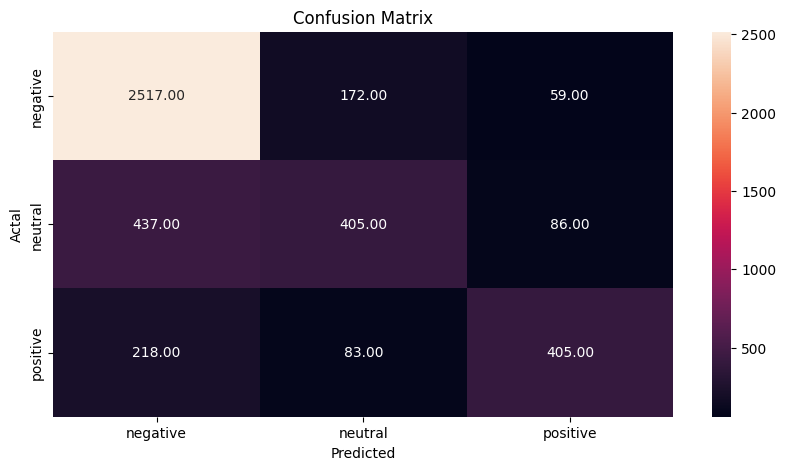

In [152]:
y_pred = model_2.predict(X_test)

cm_metrics(y_test, y_pred)

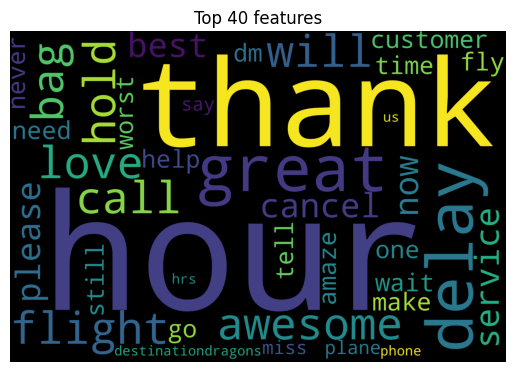

In [154]:
features = tfidf_vectorizer.get_feature_names_out()   

top40(model_2, features)

## Conclusion

* Overall our models did a decent job on predicting sentiment for the test set, but there is definitely room for improvement.
* One thing hurting our models was the neutral class as many of the neutral words were either generic or crossed over with positive or negative terms. This lack of clearly defined neutral terms caused the model to misclassify many neutral sentiments.
* We could improve on the results by perhaps trying some different machine learning models besides RandomForest.
* Creating an LSTM neural network could probably improve our results even futher than machine learning alone.
* We could also try using some unsupervised learning techniques for vectorization.

## Business Recomendations

* My biggest reccomendation would be to review the dataset to verify the neutral tweet labels. Especially those involving Jet Blue. Fixing these potentially misclassified terms could cut down on the model's confusion between the neutral and negative.
* It may also be beneficial for the company and certainly the model to reduce results to a binary classification such as negative tweets vs. non-negative. This would cut model confusion about the neutral tweets way down and greatly improve model accuracy.